# **1.1 Import Libraries**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from collections import Counter
from numpy import where

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc
import math

In [ ]:
#importing warnings to ignore filter warnings
import warnings

warnings.filterwarnings('ignore')

# **1.2 Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read and load data 'application_data.csv'

df_app = pd.read_csv('/content/drive/MyDrive/Big Data/application_data.csv')
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Checking shape and size of application_data.csv

df_app.shape

(307511, 122)

In [ ]:
#Checking stastical date of application_data.csv

df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#To view all 122 columns

pd.set_option('display.max_columns', 122)
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# **การสำรวจข้อมูล Exploratory Data Analysis (EDA)**

**่ความสัมพันธ์ของข้อมูลชนิด  type values**

In [ ]:
print("Object type values:",np.count_nonzero(df_app.select_dtypes('object').columns))
print("___________________________________________________________________________________________")
print(df_app.select_dtypes('object').columns)
print("___________________________________________________________________________________________")

Object type values: 16
___________________________________________________________________________________________
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
___________________________________________________________________________________________


In [ ]:
print("Int type values:",np.count_nonzero(df_app.select_dtypes('int').columns))
print("___________________________________________________________________________________________")
print(df_app.select_dtypes('int').columns)
print("___________________________________________________________________________________________")

Int type values: 41
___________________________________________________________________________________________
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLA

In [ ]:
print("float type values:",np.count_nonzero(df_app.select_dtypes('float').columns))
print("___________________________________________________________________________________________")
print(df_app.select_dtypes('float').columns)
print("___________________________________________________________________________________________")

float type values: 65
___________________________________________________________________________________________
Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       '



---

 **Relation Between Variables**

---




ข้อมูลที่เป็น int

In [ ]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df_app.select_dtypes('int').corr().style.applymap(color_)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001500,0.001366,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,0.019187,0.078239,-0.044932,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.330938,-0.239818,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,0.001786,0.056837,-0.003709,-0.016737,-0.157024,-0.001498,0.051697,-0.001997,-0.002756,-0.005318,0.000293,0.003945,-0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,-0.002450
DAYS_BIRTH,-0.001500,0.078239,0.330938,1.000000,-0.615864,0.272691,-0.003084,0.619888,0.172457,-0.014985,-0.042402,0.088208,0.009361,0.008073,0.091064,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882,-0.001191,0.109666,-0.002789,0.016774,-0.407160,0.001469,0.113243,0.018213,-0.000168,0.044716,0.000236,0.026333,0.030733,0.012953,0.024044,0.007877,0.044498,0.003614,0.009015,0.027282
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.615864,1.000000,-0.272378,0.000818,-0.999755,-0.233972,0.012745,0.015291,-0.062112,0.032750,0.034624,-0.091138,-0.035803,-0.107150,-0.095539,-0.090516,-0.254559,-0.218101,-0.003090,-0.249082,0.000437,-0.020041,0.597484,-0.002221,-0.121571,-0.023834,-0.000439,-0.028915,-0.001225,-0.025778,-0.023383,-0.014285,-0.042905,-0.007187,-0.040396,-0.010040,-0.010135,-0.008396
DAYS_ID_PUBLISH,-0.000384,0.051457,-0.028019,0.272691,-0.272378,1.000000,-0.002293,0.273611,0.045964,-0.000802,-0.037660,0.027505,-0.005103,-0.007737,0.031676,0.034757,0.048071,0.033938,0.076326,0.099354,0.061094,-0.000349,0.050309,0.000545,0.002066,-0.178282,-0.000034,0.024065,0.015271,-0.001214,0.022875,-0.002193,0.003048,0.008710,0.000158,0.002782,0.004804,0.014084,0.000903,0.000070,0.017246
FLAG_MOBIL,0.002804,0.000534,0.001041,-0.003084,0.000818,-0.002293,1.000000,-0.000845,0.000900,-0.000078,0.001128,0.000442,0.000186,0.000113,-0.000517,0.000224,0.000417,0.000371,0.000525,0.000987,0.000844,0.000012,0.002822,0.000016,0.000223,0.000560,0.000025,-0.006059,0.000113,0.000009,0.000113,0.000005,0.000107,0.000098,0.000063,0.000181,0.000029,-0.019919,0.000044,0.000041,0.000033
FLAG_EMP_PHONE,-0.001337,0.045982,0.240714,0.619888,-0.999755,0.273611,-0.000845,1.000000,0.233801,-0.012819,-0.016131,0.062542,-0.032871,-0.034712,0.091356,0.036640,0.108355,0.096447,0.092166,0.256427,0.219219,0.003047,0.248534,-0.000467,0.019778,-0.597732,0.001605,0.122043,0.023878,0.000463,0.029373,0.001195,0.025878,0.023559,0.014364,0.043008,0.007136,0.040548,0.010049,0.010183,0.008579
FLAG_WORK_PHONE,-0.000415,0.028524,0.055630,0.172457,-0.233972,0.045964,0.000900,0.233801,1.000000,0.021580,0.29

<Axes: >

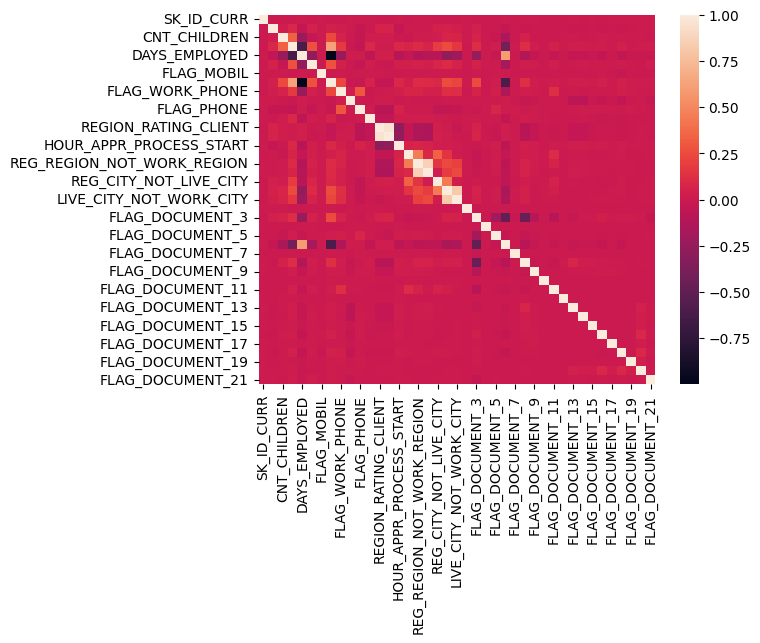

In [ ]:
sns.heatmap(df_app.select_dtypes('int').corr())

ข้อมูลที่เป็น float

In [ ]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df_app.select_dtypes('float').corr().style.applymap(color_)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159610,0.074796,0.027805,-0.117273,0.016342,0.026232,0.060925,-0.030229,0.034501,0.017303,0.005658,0.042334,0.089616,0.045053,0.005394,0.060171,0.139860,-0.001598,0.106920,0.039976,0.029520,0.074604,0.029994,0.012821,0.005284,0.037299,0.075625,0.041032,0.002027,0.057675,0.131800,-0.003674,0.092991,0.034915,0.025020,0.061778,0.033798,0.016381,0.005639,0.042004,0.087918,0.044160,0.004787,0.059682,0.138489,-0.001892,0.104914,0.039261,0.028098,0.070844,0.041985,-0.013099,-0.013244,-0.013015,-0.013135,-0.018585,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,0.156870,1.000000,0.770138,0.986968,0.099738,0.009621,-0.094191,0.063160,0.168429,0.131228,0.043516,0.060439,0.039226,0.006249,0.035875,0.049537,0.080635,0.014929,0.103296,0.078832,0.006218,0.058788,0.072146,0.014362,0.037885,0.053072,0.031213,0.004804,0.033478,0.042341,0.074740,0.009361,0.100418,0.075485,0.002532,0.051208,0.064142,0.011106,0.032390,0.058682,0.037281,0.005765,0.035589,0.048565,0.079094,0.013692,0.102770,0.078375,0.005415,0.057058,0.070860,0.013402,0.035829,0.072818,0.000190,-0.021229,0.000239,-0.023767,-0.073701,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,0.191657,0.770138,1.000000,0.775109,0.118429,0.038514,-0.097057,0.075539,0.119398,0.125804,0.030752,0.076213,0.044507,0.013298,0.034195,0.057628,0.101439,0.014745,0.130174,0.099812,0.008611,0.075293,0.089659,0.021306,0.049593,0.066401,0.034443,0.012555,0.030932,0.049074,0.093131,0.007362,0.126302,0.094457,0.003621,0.065606,0.079426,0.016754,0.041418,0.073987,0.042452,0.012940,0.033713,0.056865,0.099559,0.013276,0.129179,0.098642,0.007711,0.073049,0.088134,0.020473,0.047009,0.090415,-0.011987,-0.022833,-0.011731,-0.024001,-0.063747,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,0.159610,0.986968,0.775109,1.000000,0.103520,0.011565,-0.103733,0.061185,0.175502,0.139367,0.047717,0.064918,0.043982,0.007245,0.041937,0.050507,0.083736,0.018764,0.108512,0.081411,0.013297,0.061850,0.077307,0.015424,0.041912,0.057523,0.035811,0.005799,0.039410,0.043086,0.077978,0.013335,0.105532,0.077770,0.009379,0.053813,0.069324,0.011866,0.036403,0.063187,0.041980,0.006839,0.041583,0.049519,0.082266,0.017585,0.107936,0.080863,0.012550,0.060104,0.076028,0.014381,0.039874,0.077527,0.000328,-0.022244,0.000347,-0.024506,-0.076313,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.074796,0.099738,0.118429,0.103520,1.000000,-0.053820,-0.081429,-0.024209,0.099997,0.198924,-0.006001,0.205942,0.098423,-0.006683,-0.056566,0.164806,0.280685,0.036840,0.322652,0.294349,-0.051160,0.194452,0.213491,0.024293,0.074816,0.175029,0.065779,-0.006837,-0.063779,0.130931,0.251539,0.015983,0.303992,0.275656,-0.060558,0.163156,0.18

<Axes: >

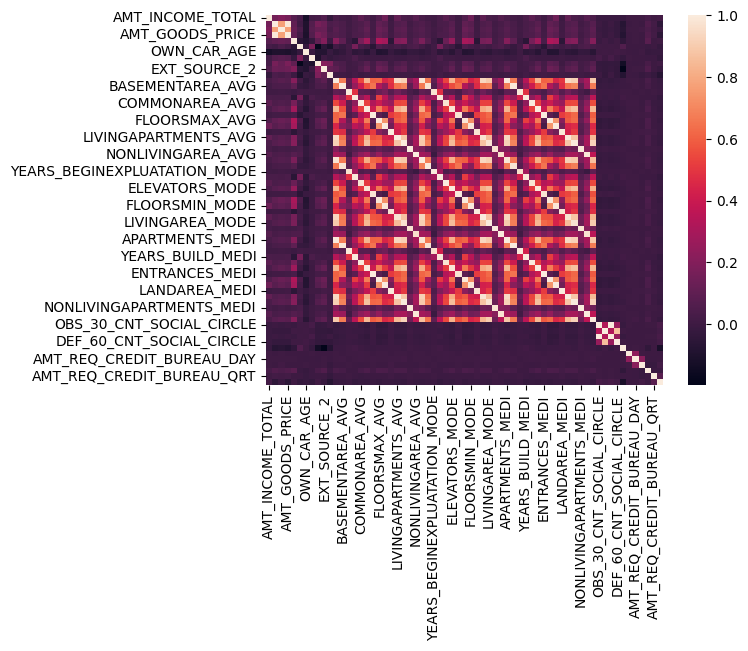

In [ ]:
sns.heatmap(df_app.select_dtypes('float').corr())



---


**Descriptive Statistics**


---



In [ ]:
#df_app.agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

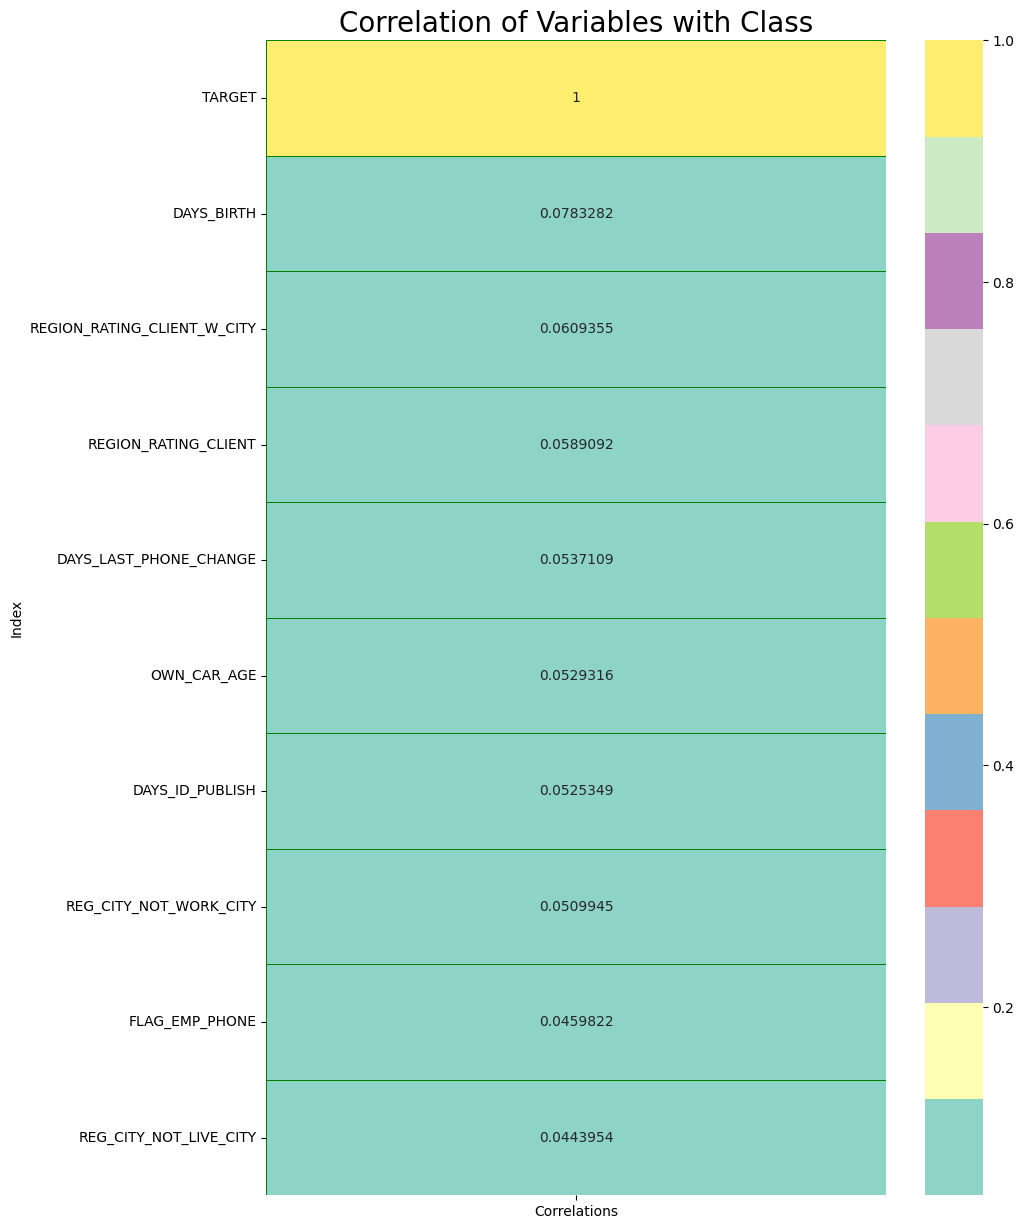

In [ ]:
corr = df_app.corrwith(df_app['TARGET'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

# **1.3 NULL**



---
**ตรวจหา Mising Values(NULL)**


---




In [ ]:
# Working with null values
# finding percentage null values in each columns and arranging them in ascending order

df_app.isnull().sum()/len(df_app)*100
(df_app.isnull().sum()/len(df_app)*100).sort_values(ascending= False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [ ]:
# removing columns where null values are more than 50%
app_data_clean = df_app.loc[ : ,(df_app.isnull().sum()/len(df_app)*100 <50)]
app_data_clean.shape

(307511, 81)

In [ ]:
#Checking cleaned where data has null values less than 50

app_data_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking data with more than 30% null values

app_data_clean.loc[ : ,(app_data_clean.isnull().sum()/len(app_data_clean)*100 >30)].head()

,OCCUPATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE
0,Laborers,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No
1,Core staff,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No
2,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Core staff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Checking CLEANED DATA,  where data has null values less than 30
#But we missed OCCUPATION_TYPE and TOTALAREA_MODE
# TOTALAREA_MODE- we are keeping this as this shows how big the applicant's own house area is- This is an ASSEST
# OCCUPATION_TYPE- This captures the nature of job and gives us sense of appliant's income security.
# These are important factor for approving or rejecting loans

app_data_clean = app_data_clean.loc[ : ,(app_data_clean.isnull().sum()/len(app_data_clean)*100 <30)]
app_data_clean.shape

(307511, 72)

In [ ]:
# adding OCCUPATION_TYPE and TOTALAREA_MODE and OCCUPATION_TYPEback
app_data_clean['OCCUPATION_TYPE'] = df_app['OCCUPATION_TYPE']
app_data_clean['TOTALAREA_MODE'] = df_app['TOTALAREA_MODE']
app_data_clean.shape

(307511, 74)

In [ ]:
#Checking the new heads

app_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
# some columns have negative age details in days, we will need to convert them into Years data type
# We will use user defined function for this

def convert_to_years(value):
    return abs(value//365)

app_data_clean['YEARS_BIRTH']= app_data_clean['DAYS_BIRTH'].apply(convert_to_years)
app_data_clean['YEARS_EMPLOYED']= app_data_clean['DAYS_EMPLOYED'].apply(convert_to_years)
app_data_clean['YEARS_REGISTRATION']= app_data_clean['DAYS_REGISTRATION'].apply(convert_to_years)
app_data_clean['YEARS_ID_PUBLISH']= app_data_clean['DAYS_ID_PUBLISH'].apply(convert_to_years)
app_data_clean['YEARS_LAST_PHONE_CHANGE']= app_data_clean['DAYS_LAST_PHONE_CHANGE'].apply(convert_to_years)

app_data_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE,TOTALAREA_MODE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Laborers,0.0149,26,2,10.0,6,4.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Core staff,0.0714,46,4,4.0,1,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Laborers,NaN,53,1,12.0,7,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,53,9,27.0,7,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Core staff,NaN,55,9,12.0,10,4.0


In [ ]:
app_data_clean.shape #คอลัมน์เก่า ก่อนเปลี่ยนเป็นปี 5 คอลัมน์

(307511, 79)

# **1.4Drop Column**

In [ ]:
# Droping unwanted FLAG_DOCUMENT columns

app_data_clean.drop(app_data_clean.loc[ : ,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'], axis= 1, inplace=True)

In [ ]:
app_data_clean.shape

(307511, 59)

In [ ]:
app_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
# Droping WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, NAME_TYPE_SUITE
# EXT_SOURCE_2, EXT_SOURCE_3

unwanted= ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE','EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
           'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
app_data_clean.drop(labels= unwanted, axis= 1, inplace= True)

In [ ]:
app_data_clean.shape

(307511, 49)

In [ ]:
app_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [ ]:
app_data_clean

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE,TOTALAREA_MODE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Laborers,0.0149,26,2,10.0,6,4.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Core staff,0.0714,46,4,4.0,1,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laborers,NaN,53,1,12.0,7,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,53,9,27.0,7,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Core staff,NaN,55,9,12.0,10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,1,1,0,1,0,0,1.0,1,1,0,0,0,0,0,0,Services,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Sales staff,0.2898,26,1,24.0,6,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,1,0,0,1,1,0,1.0,2,2,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0214,57,1000,13.0,12,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,1,1,0,1,0,1,1.0,3,3,0,0,0,0,1,1,School,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,Managers,0.7970,42,22,19.0,15,6.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,1,1,0,1,0,0,2.0,2,2,0,0,0,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laborers,0.0086,33,14,8.0,3,1.0


In [ ]:
#Observation:-

# We  notice that for years of employment max is 1000 years, which is impossible
# We will need to check and replace accordinlgy

In [ ]:
# DAYS_EMPLOYED- max need to be changed

app_data_clean.YEARS_EMPLOYED.value_counts()

1000    55374
2       31845
3       29627
1       27980
4       25101
5       21756
6       16260
7       15059
8       13142
9       11428
10       8983
11       7352
12       5901
13       5307
15       4636
14       4353
16       2730
17       2328
18       2008
19       1915
20       1868
21       1602
22       1459
23       1255
24       1014
25        913
26        822
28        655
27        655
29        608
30        568
31        456
32        438
35        361
33        352
34        332
36        258
37        195
38        140
40        124
39        115
41         59
42         59
43         42
45         31
44         19
46         14
49          4
47          4
0           2
48          1
50          1
Name: YEARS_EMPLOYED, dtype: int64

In [ ]:
# 55374 number of applicates say they are employed for 1000 years, investigating deeper

app_data_clean[app_data_clean.YEARS_EMPLOYED == 1000].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
#Observation:-

#so pensioners and unemployed have entered incorrect data of 1000 years of employment
# For correct data analysis, this need to be replaced by NAN/ null

app_data_clean.loc[app_data_clean.YEARS_EMPLOYED == 1000, 'YEARS_EMPLOYED']= np.NAN

In [ ]:
#Checking if this worked

app_data_clean.YEARS_EMPLOYED.value_counts()

2.0     31845
3.0     29627
1.0     27980
4.0     25101
5.0     21756
6.0     16260
7.0     15059
8.0     13142
9.0     11428
10.0     8983
11.0     7352
12.0     5901
13.0     5307
15.0     4636
14.0     4353
16.0     2730
17.0     2328
18.0     2008
19.0     1915
20.0     1868
21.0     1602
22.0     1459
23.0     1255
24.0     1014
25.0      913
26.0      822
28.0      655
27.0      655
29.0      608
30.0      568
31.0      456
32.0      438
35.0      361
33.0      352
34.0      332
36.0      258
37.0      195
38.0      140
40.0      124
39.0      115
41.0       59
42.0       59
43.0       42
45.0       31
44.0       19
46.0       14
49.0        4
47.0        4
0.0         2
48.0        1
50.0        1
Name: YEARS_EMPLOYED, dtype: int64

In [ ]:
# ดูค่า null ในคอลัมน์ "Gender"
null_count = app_data_clean['CODE_GENDER'].isnull().sum()  # หรือใช้ df['Gender'].isna().sum()

print("Number of null values in 'CODE_GENDER' column:", null_count)


Number of null values in 'CODE_GENDER' column: 0


In [ ]:
# กรองแถวที่มีคอลัมน์ "gender" เป็น "XNA"
xna_rows = app_data_clean['CODE_GENDER'] == 'XNA'  # แกเไขเปลี่ยน XNA
# แสดงแถวที่มีคอลัมน์ "gender" เป็น "XNA"
print(xna_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: CODE_GENDER, Length: 307511, dtype: bool


In [ ]:
app_data_clean= app_data_clean.replace("XNA",np.NaN)

In [ ]:
app_data_clean.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
app_data_clean.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
app_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [ ]:
app_data_clean.isnull().sum()/len(df_app)*100
(app_data_clean.isnull().sum()/len(df_app)*100).sort_values(ascending= False)

TOTALAREA_MODE                 48.268517
OCCUPATION_TYPE                31.345545
ORGANIZATION_TYPE              18.007161
YEARS_EMPLOYED                 18.007161
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CODE_GENDER                     0.001301
CNT_FAM_MEMBERS                 0.000650
YEARS_LAST_PHONE_CHANGE         0.000325
LIVE_REGION_NOT_WORK_REGION     0.000000
YEARS_BIRTH                     0.000000
YEARS_REGISTRATION              0.000000
YEARS_ID_PUBLISH                0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WOR

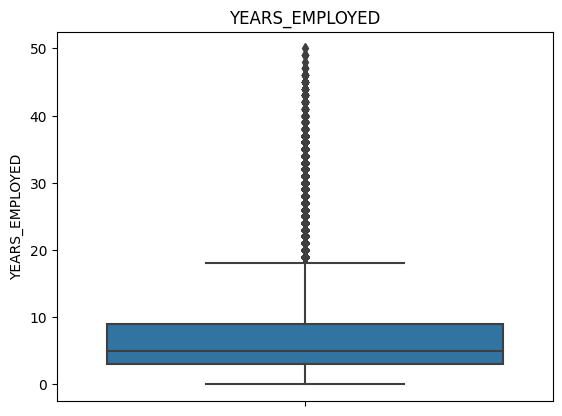

In [ ]:
# Checking DAYS_EMPLOYED

sns.boxplot(y= 'YEARS_EMPLOYED', data= app_data_clean)
plt.title('YEARS_EMPLOYED')
plt.show()

In [ ]:
# Observations:-

#มีสิ่งผิดปกติเกิดขึ้น แต่สิ่งเหล่านี้สามารถให้ข้อมูลเชิงลึกอันมีค่าเกี่ยวกับการจ้างงานได้ ดังนั้นเราจึงยังคงรักษาสิ่งเหล่านั้นไว้

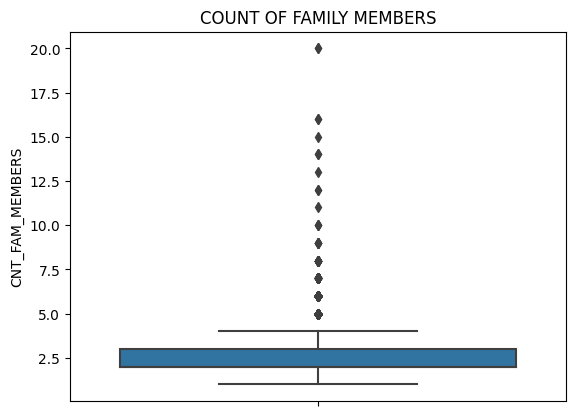

In [ ]:
#Checking outliers in CNT_FAM_MEMBERS

sns.boxplot(y='CNT_FAM_MEMBERS',data=app_data_clean)
plt.title('COUNT OF FAMILY MEMBERS')
plt.show()

In [ ]:
# Observations:-

# Outliers are a few applicants with more family members, we will keep them as these might add new insight

In [ ]:
#Checking ORGANIZATION_TYPE, as this is a critical information
#57 is XNA
app_data_clean.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [ ]:
# Replacing XNA with NaN   คือ แทนที่ XNA เป็นค่า NULL ทั้งหมด
#XNA คือ คนที่ไม่มีที่ทำงาน เท่ากับ ว่างงาน
#คนที่ไม่ได้ใส่อาชีพอาจจะมีที่ทำงาน
#OTHER ไม่ใช่ว่างงานทั้งหมด
app_data_clean= app_data_clean.replace("XNA",np.NaN)

In [ ]:
#Checking the new column

app_data_clean.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [ ]:
app_data_clean.CODE_GENDER.value_counts() #2.0 เป็น XNA

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
#จัดการค่า 2.0  เป็นค่า null
app_data_clean.loc[app_data_clean.CODE_GENDER == "XNA", 'CODE_GENDER']= np.NAN

In [ ]:
app_data_clean = app_data_clean.replace("XNA",np.NaN)

In [ ]:
app_data_clean.dropna(subset=['CODE_GENDER'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE,TOTALAREA_MODE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,Laborers,0.0149,26,2.0,10.0,6,4.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,2.0,1,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Core staff,0.0714,46,4.0,4.0,1,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,1.0,2,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laborers,NaN,53,1.0,12.0,7,3.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,53,9.0,27.0,7,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,1.0,2,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Core staff,NaN,55,9.0,12.0,10,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,1,1,0,1,0,0,1.0,1,1,0,0,0,0,0,0,Services,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Sales staff,0.2898,26,1.0,24.0,6,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,1,0,0,1,1,0,1.0,2,2,0,0,0,0,0,0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0214,57,NaN,13.0,12,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,1,1,0,1,0,1,1.0,3,3,0,0,0,0,1,1,School,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,Managers,0.7970,42,22.0,19.0,15,6.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,1,1,0,1,0,0,2.0,2,2,0,0,0,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laborers,0.0086,33,14.0,8.0,3,1.0


In [ ]:
app_data_clean.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

# **1.5 Analysis Application Data**
Univariate & Multi-variate Analysis of Application Data

In [ ]:
df_clean = app_data_clean

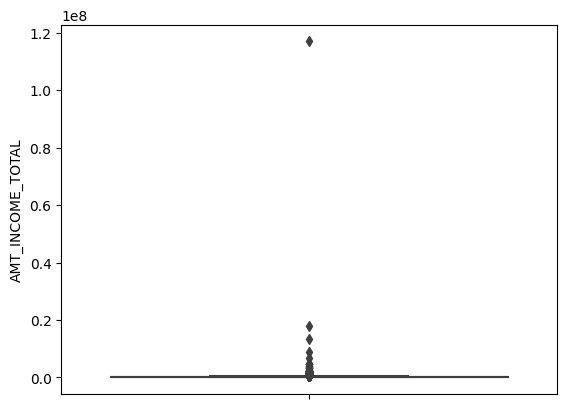

In [ ]:
# Checking AMT_INCOME_TOTAL
sns.boxplot(y='AMT_INCOME_TOTAL', data= df_clean)
plt.show()

In [ ]:
# We are further ananlysis AMT_INCOME_TOTAL column for better understanding
df_clean.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

 **Observation**

แสดงว่ามีค่าผิดปกติใน AMT_INCOME_TOTAL ซึ่งเป็นรายได้ที่สูงมาก


เราจะไม่ปฏิบัติต่อค่าผิดปกติเหล่านี้

เราพบว่าจำนวนผู้สมัคร 75% อยู่ในช่วง 2.025000e+05 โดยที่เหลือ 25%อยู่ในช่วงหลังจากนั้น

รายได้รวมสูงสุดคือ 1.170000e+08


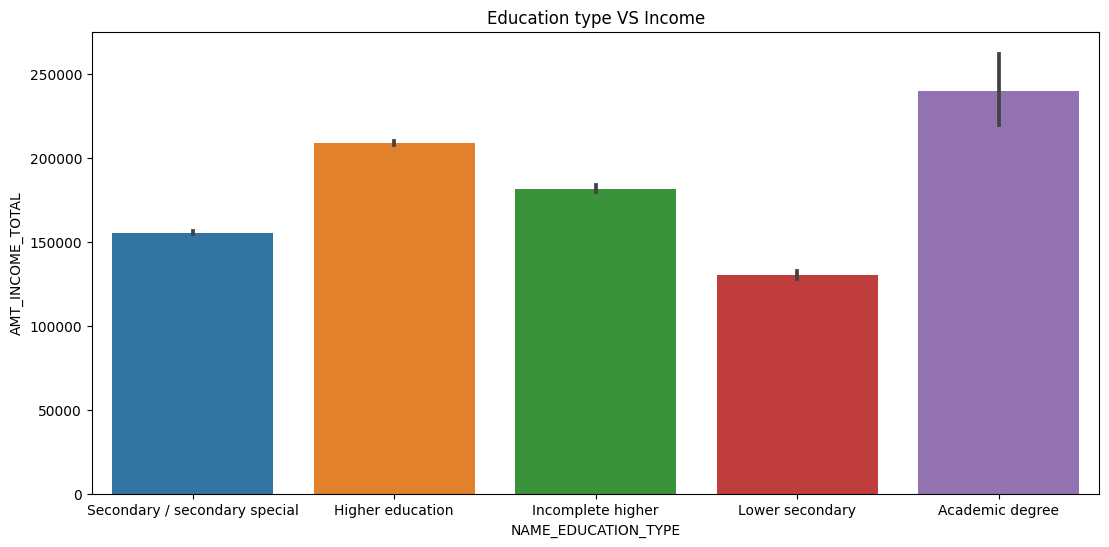

In [ ]:
#Let us check Education type and Income relationship

plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data= df_clean)
plt.title('Education type VS Income')
plt.show()

**Observation**

รายได้ต่อปีเพิ่มขึ้นเมื่อมีการศึกษามากขึ้น

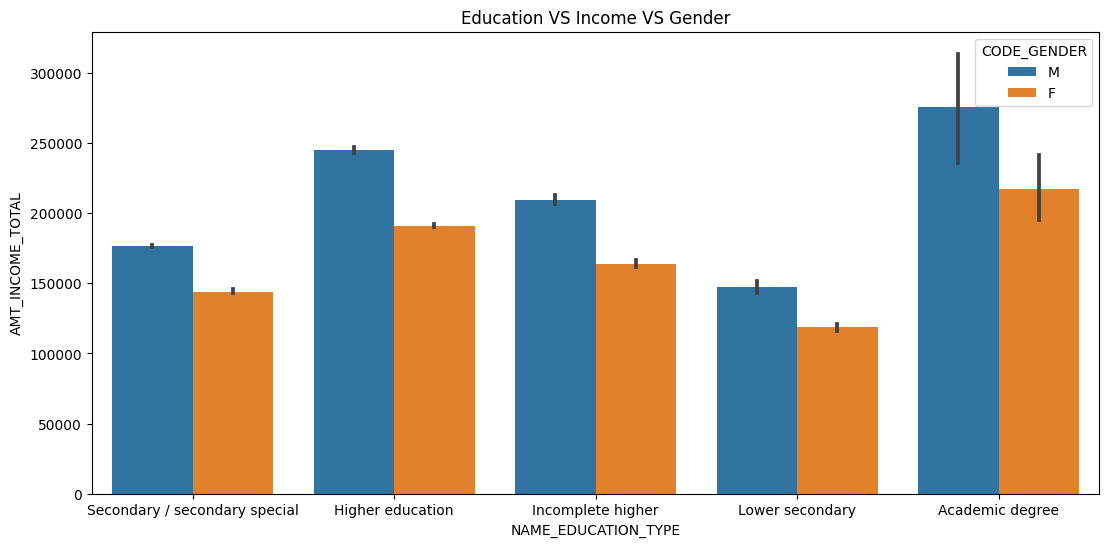

In [ ]:
# Education VS Income VS Gender

plt.figure(figsize=(13,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=df_clean, hue= 'CODE_GENDER')
plt.title('Education VS Income VS Gender')
plt.show()

**Observation**

สังเกตได้ว่าผู้ชายมีการศึกษามากกว่าและได้รับค่าตอบแทนดีกว่าผู้หญิง

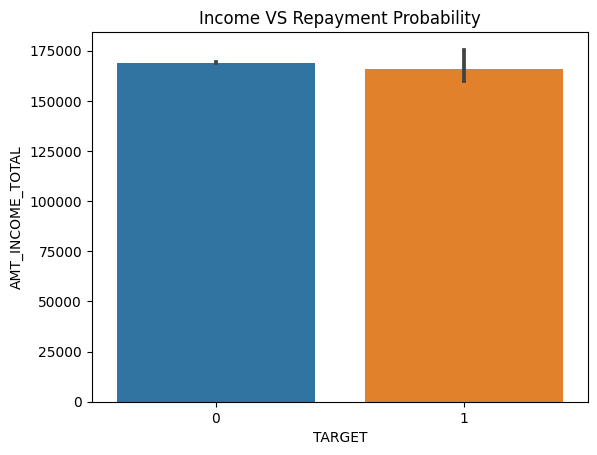

In [ ]:
# ให้เราตรวจสอบความสัมพันธ์ระหว่าง AMT_INCOME_TOTAL และความง่ายในการชำระคืน

sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data= df_clean)
plt.title('Income VS Repayment Probability')
plt.show()

**Observation**

เราไม่เห็นความสัมพันธ์ระหว่าง Target และ AMT_INCOME_TOTAL
ดังนั้น เราจะต้องค้นหาตัวแปรอื่นเพื่อตรวจสอบความสัมพันธ์ที่เป็นไปได้

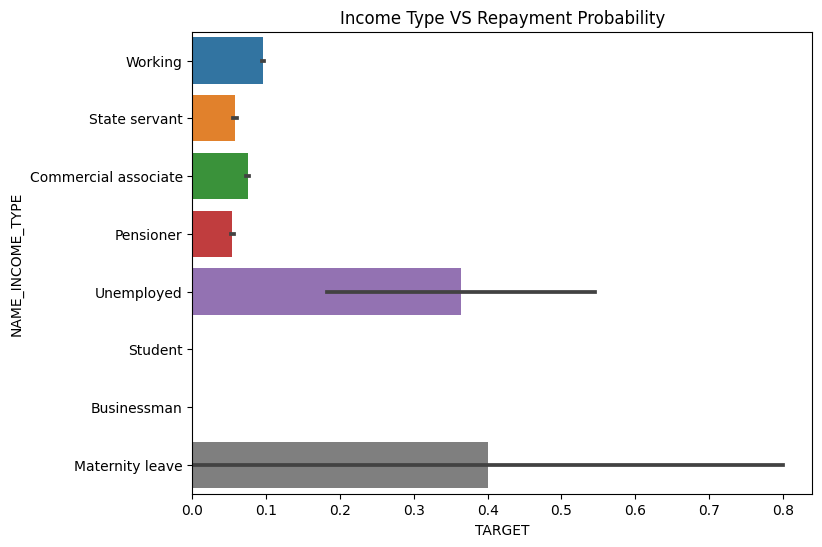

In [ ]:
# We are now going to check the relationship between Income Type and Ease of repayment

plt.figure(figsize=(8,6))
sns.barplot(x= 'TARGET', y= 'NAME_INCOME_TYPE', data= df_clean)
plt.title('Income Type VS Repayment Probability')
plt.show()

**Observations**

ประเภทรายได้ของการว่างงานและการลาคลอดบุตรมีความเป็นไปได้ที่จะผิดนัดมากกว่า (Unemployed and Marternity)

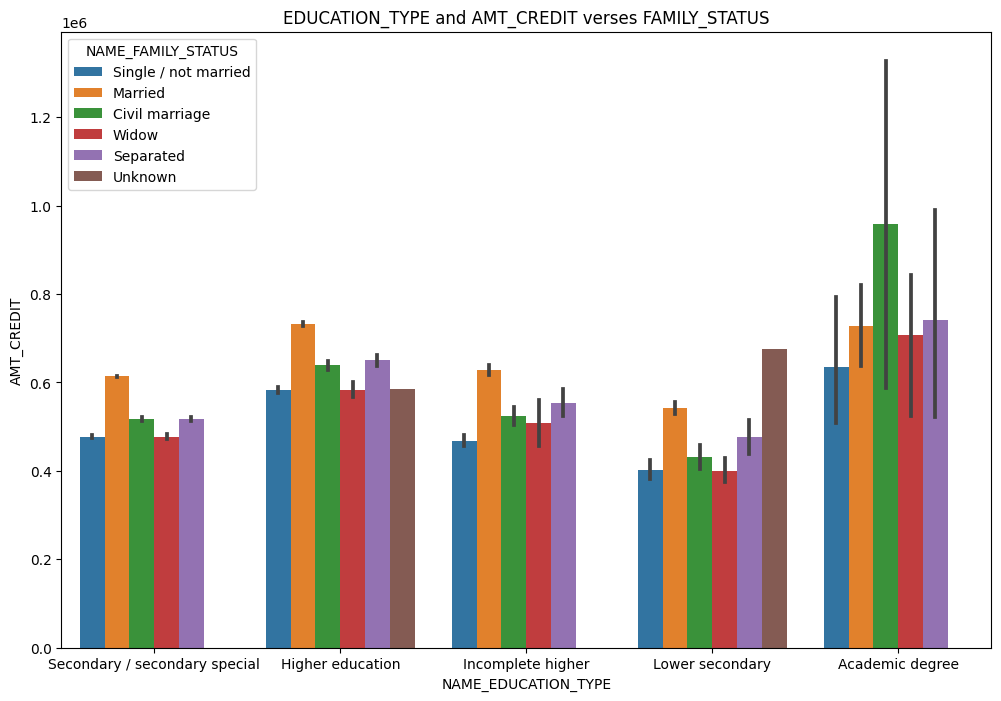

In [ ]:
# Checking NAME_EDUCATION_TYPE and AMT_CREDIT verses NAME_FAMILY_STATUS

plt.figure(figsize=(12,8))
#plt.xticks(rotation=45)
sns.barplot(data= df_clean, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('EDUCATION_TYPE and AMT_CREDIT verses FAMILY_STATUS')
plt.show()

**Observations**

เราจะเห็นว่าผู้สมัครได้รับเครดิตจำนวนเงินกู้ส่วนใหญ่ที่มีสถานะทางครอบครัวเป็นการสมรสและมีวุฒิการศึกษา

 เรายังสังเกตเห็นว่าโสด/ไม่ได้แต่งงานมี Amt_Credit ต่ำที่สุด โดยไม่คำนึงถึงประเภทการศึกษา

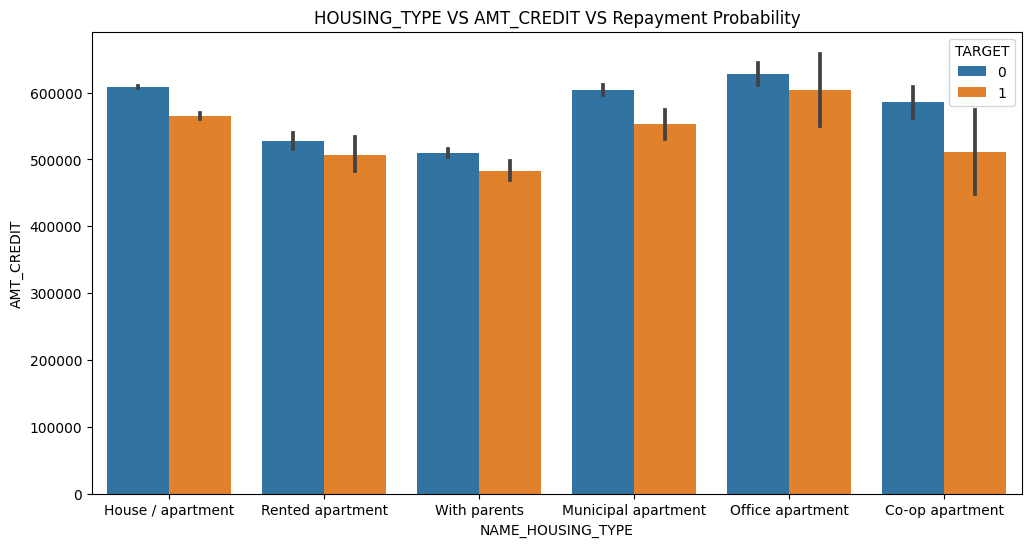

In [ ]:
# Checking AMT_CREDIT and NAME_HOUSING_TYPE verses Repayment Probability

plt.figure(figsize=(12,6))
#plt.xticks(rotation=45)
sns.barplot(data= df_clean, x='NAME_HOUSING_TYPE', y='AMT_CREDIT', hue ='TARGET')
plt.title('HOUSING_TYPE VS AMT_CREDIT VS Repayment Probability')
plt.show()

**Observations**

ผู้สมัครที่พักอาศัยในออฟฟิศอพาร์ทเมนท์จะได้รับเครดิตจำนวนสูงสุดและยังมีโอกาสผิดนัดชำระหนี้สูงที่สุดอีกด้วย

# **Checking Imbalance**

In [ ]:
df_clean.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
labels=["0","1"]

fraud_or_not = df_clean["TARGET"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df_clean['TARGET'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="0 vs 1 transactions")
fig.show()

In [ ]:
print('0:', round(df_clean['TARGET'].value_counts()[0]/len(df_clean) * 100,2), '% of the dataset')
print('1:', round(df_clean['TARGET'].value_counts()[1]/len(df_clean) * 100,2), '% of the dataset')

0: 91.93 % of the dataset
1: 8.07 % of the dataset


**Observation**

ความไม่สมดุลสูงระหว่างค่าเป้าหมายจึงแบ่งพวกมัน

# **Label Encoding เป็นเทคนิคในการแปลงข้อมูลข้อความ (categorical data) เป็นข้อมูลตัวเลข (numerical data)**

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [ ]:
df_clean[df_clean.CODE_GENDER == 2.0].CODE_GENDER.value_counts()

Series([], Name: CODE_GENDER, dtype: int64)

In [ ]:
#จัดการค่า'XNA' 2.0  เป็นค่า null
df_clean.loc[df_clean.CODE_GENDER == 2.0, 'CODE_GENDER']= np.NAN
df_clean = df_clean.replace(2.0,np.NaN)

In [ ]:
column_name = 'CODE_GENDER'

# Remove rows with null values in the specified column
df_clean = df_clean.dropna(subset=[column_name])

In [ ]:
print("Object type values:",np.count_nonzero(df_clean.select_dtypes('object').columns))
print("___________________________________________________________________________________________")
print(df_clean.select_dtypes('object').columns)
print("___________________________________________________________________________________________")

Object type values: 10
___________________________________________________________________________________________
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')
___________________________________________________________________________________________


In [ ]:
le = LabelEncoder()
df_clean['NAME_CONTRACT_TYPE'] = le.fit_transform(df_clean['NAME_CONTRACT_TYPE']).astype(float)
df_clean['CODE_GENDER'] = le.fit_transform(df_clean['CODE_GENDER']).astype(float)
df_clean['FLAG_OWN_CAR'] = le.fit_transform(df_clean['FLAG_OWN_CAR']).astype(float)
df_clean['FLAG_OWN_REALTY'] = le.fit_transform(df_clean['FLAG_OWN_REALTY']).astype(float)
df_clean['NAME_INCOME_TYPE'] = le.fit_transform(df_clean['NAME_INCOME_TYPE']).astype(float)
df_clean['NAME_EDUCATION_TYPE'] = le.fit_transform(df_clean['NAME_EDUCATION_TYPE']).astype(float)
df_clean['NAME_FAMILY_STATUS'] = le.fit_transform(df_clean['NAME_FAMILY_STATUS']).astype(float)
df_clean['NAME_HOUSING_TYPE'] = le.fit_transform(df_clean['NAME_HOUSING_TYPE']).astype(float)
df_clean['OCCUPATION_TYPE'] = le.fit_transform(df_clean['OCCUPATION_TYPE'].astype(str)).astype(float)
df_clean['ORGANIZATION_TYPE'] = le.fit_transform(df_clean['ORGANIZATION_TYPE']).astype(float)


ใช้ LabelEncoder เพื่อแปลงข้อมูลข้อความ (categorical data) ในคอลัมน์ต่าง ๆ ใน DataFrame df_app เป็นข้อมูลตัวเลข โดยใช้การแปลงเลขตำแหน่ง (label encoding). การนี้ช่วยให้คุณสามารถใช้ข้อมูลเหล่านี้ในการฝึกและทดสอบโมเดล Machine Learning ที่ต้องการข้อมูลตัวเลขเป็นประเภทข้อมูลนำเสนอ (numerical data) ได้ง่ายขึ้น.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  float64
 3   CODE_GENDER                  307511 non-null  float64
 4   FLAG_OWN_CAR                 307511 non-null  float64
 5   FLAG_OWN_REALTY              307511 non-null  float64
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  float64
 12  NAME_EDUCATION_TYPE          307511 non-null  float64
 13 

In [ ]:
print("Object type values:",np.count_nonzero(df_clean.select_dtypes('object').columns))
print("___________________________________________________________________________________________")
print(df_clean.select_dtypes('object').columns)
print("___________________________________________________________________________________________")

Object type values: 0
___________________________________________________________________________________________
Index([], dtype='object')
___________________________________________________________________________________________


In [ ]:
print("Object type values:",np.count_nonzero(df_clean.select_dtypes('int').columns))
print("___________________________________________________________________________________________")
print(df_clean.select_dtypes('int').columns)
print("___________________________________________________________________________________________")

Object type values: 19
___________________________________________________________________________________________
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BIRTH',
       'YEARS_ID_PUBLISH'],
      dtype='object')
___________________________________________________________________________________________


In [ ]:
print("Object type values:",np.count_nonzero(df_clean.select_dtypes('float').columns))
print("___________________________________________________________________________________________")
print(df_clean.select_dtypes('float').columns)
print("___________________________________________________________________________________________")

Object type values: 30
___________________________________________________________________________________________
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OCCUPATION_TYPE', 'TOTALAREA_MODE',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_LAST_PHONE_CHANGE'],
      dtype='object')
___________________________________________________________________________________________


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("ColumnConversion").getOrCreate()

# Assuming you have your data as a DataFrame named "df_clean" in PySpark
# List of column names that you want to change from int to float
columns_to_convert = ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                      'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                      'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                      'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                      'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                      'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BIRTH',
                      'YEARS_ID_PUBLISH']

# Convert the specified columns to float
for column_name in columns_to_convert:
    df_clean = df_clean.withColumn(column_name, col(column_name).cast('float'))

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  float64
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  float64
 3   CODE_GENDER                  307507 non-null  float64
 4   FLAG_OWN_CAR                 307511 non-null  float64
 5   FLAG_OWN_REALTY              307511 non-null  float64
 6   CNT_CHILDREN                 280762 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307506 non-null  float64
 12  NAME_EDUCATION_TYPE          297234 non-null  float64
 13 

In [ ]:
sns.heatmap(df_clean.select_dtypes('float').corr())

In [ ]:
# เซฟ DataFrame เป็นไฟล์ CSV
df_clean.to_csv('Data_Dummy2.csv', index=False)  # 'my_dataframe.csv' คือชื่อไฟล์ที่คุณต้องการให้ DataFrame ถูกบันทึกลง

# **1.6 ดูความสัมพันธ์ของข้อมูลต่างๆกับคอลัมน์ TARGET**

In [ ]:
# Grouping Age into bins of '20-30','30-40','40-50','50-60','>60'

df_clean['Age_Group']= pd.cut(df_clean.YEARS_BIRTH,[20,30,40,50,60,80],labels=['20-30','30-40','40-50','50-60','>60'])
df_clean.info()

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data= df_clean, x='Age_Group', y='YEARS_EMPLOYED', hue ='TARGET')
plt.title('Age_Group VS YEARS_EMPLOYED VS TARGET')
plt.show()

**Observations**


*   เมื่ออายุเพิ่มขึ้น ความน่าจะเป็นในการชำระคืนเงินกู้จะสูงขึ้นโดยไม่คำนึงถึงปีที่ทำงาน



---


การแบ่งชุดข้อมูลแอปออกเป็นชุดข้อมูลที่แตกต่างกัน 2 ชุดตามค่า "เป้าหมาย"


---



In [ ]:
# Dividing the original dataset into two different datasets depending upon the target value
target0 = df_clean.loc[df_clean.TARGET == 0]
target1 = df_clean.loc[df_clean.TARGET == 1]

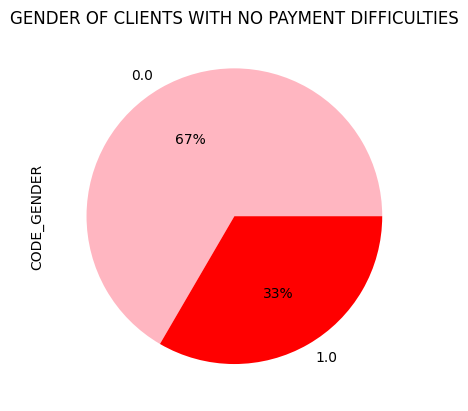

In [ ]:
# การวิเคราะห์เพศของผู้ที่ไม่มีปัญหาการชำระเงิน
target0.CODE_GENDER.value_counts().plot.pie(autopct='%1.0f%%',colors=['lightpink','red'],)
plt.title('GENDER OF CLIENTS WITH NO PAYMENT DIFFICULTIES')
plt.show()

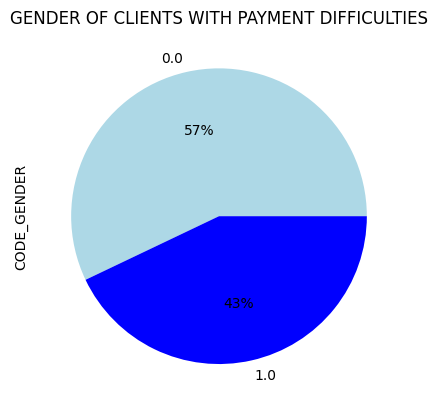

In [ ]:
# การวิเคราะห์เพศของผู้ที่มีปัญหาการชำระเงิน
target1.CODE_GENDER.value_counts().plot.pie(autopct='%1.0f%%',colors=['lightblue','blue'],)
plt.title('GENDER OF CLIENTS WITH PAYMENT DIFFICULTIES')
plt.show()

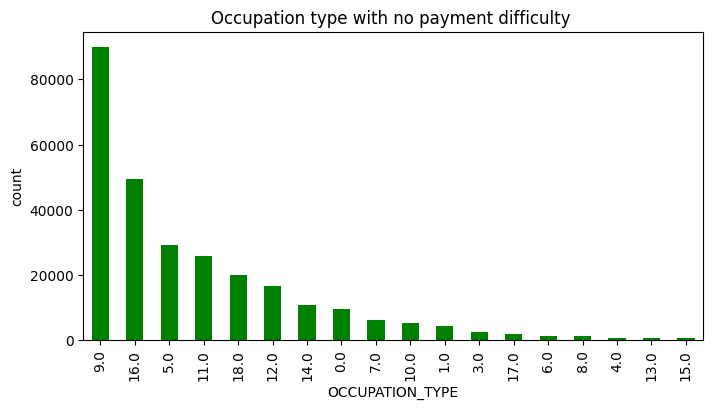

In [ ]:
#ประเภทอาชีพที่ไม่มีปัญหาเรื่องการชำระเงิน
plt.figure(figsize=(8,4))
target0.OCCUPATION_TYPE.value_counts().plot.bar(color='green')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('count')
plt.title('Occupation type with no payment difficulty ')
plt.show()

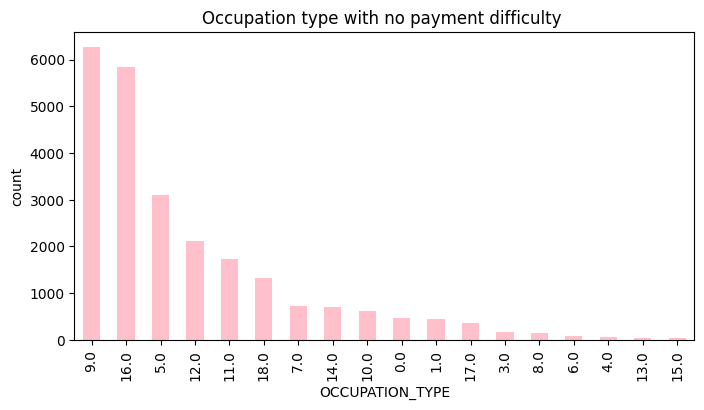

In [ ]:
#ประเภทอาชีพที่มีปัญหาเรื่องการชำระเงิน
plt.figure(figsize=(8,4))
target1.OCCUPATION_TYPE.value_counts().plot.bar(color='pink')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('count')
plt.title('Occupation type with no payment difficulty ')
plt.show()

In [ ]:
 #เปอร์เซ็นต์ของสถานะครอบครัวที่มีปัญหาในการชำระเงิน
(target1.NAME_FAMILY_STATUS.value_counts()/app_data_clean.NAME_FAMILY_STATUS.value_counts())*100

0.0                    NaN
1.0                    NaN
4.0                    NaN
5.0                    NaN
Civil marriage         NaN
Married                NaN
Separated              NaN
Single / not married   NaN
Unknown                NaN
Widow                  NaN
Name: NAME_FAMILY_STATUS, dtype: float64

ข้อสังเกต:- ใช้กับปัญหาการชำระเงิน


*   เครดิตจำนวนเงินกู้ลดลงตามจำนวนครอบครัวที่เพิ่มขึ้น
*  เครดิตเงินกู้เพิ่มขึ้น แต่รายได้ไม่เพิ่มขึ้น ดังนั้นจึงมีปัญหาในการชำระเงิน
* เครดิตเงินกู้กำลังเพิ่มขึ้นโดยที่จำนวนครอบครัวลดลง ความสัมพันธ์เชิงลบจึงเกิดขึ้น
*   เมื่ออายุและปีที่ทำงานเพิ่มขึ้น จำนวนครอบครัวก็ลดลง




***Finding Top 10 correlation***

ความสัมพันธ์ 10 อันดับแรกสำหรับผู้สมัครที่มีปัญหาในการชำระเงิน

In [ ]:
column_names = df_clean.columns
print(column_names)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
     

In [ ]:
corr = target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED', 'YEARS_BIRTH', 'YEARS_REGISTRATION','CODE_GENDER',
              'YEARS_ID_PUBLISH','AMT_CREDIT','NAME_FAMILY_STATUS','OCCUPATION_TYPE','REGION_RATING_CLIENT']].corr(method = 'pearson')

corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()

In [ ]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset = ['CORRELATION'],inplace=True)
corr_df['CORR_ABS'] = corr_df['CORRELATION'].abs()

In [ ]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10) #ascending=False คือการเรียงลำดับจากมากไปหาน้อย (ค่าสูงไปหากค่าต่ำ).

,VAR1,VAR2,CORRELATION,CORR_ABS
96,AMT_CREDIT,AMT_GOODS_PRICE,0.983103,0.983103
24,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699,0.752699
98,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
126,OCCUPATION_TYPE,CODE_GENDER,0.364999,0.364999
133,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,-0.342540,0.342540
51,YEARS_BIRTH,YEARS_EMPLOYED,0.320053,0.320053
64,YEARS_REGISTRATION,YEARS_BIRTH,0.293824,0.293824
88,YEARS_ID_PUBLISH,YEARS_BIRTH,0.255246,0.255246
134,REGION_RATING_CLIENT,AMT_ANNUITY,-0.206986,0.206986
112,NAME_FAMILY_STATUS,YEARS_BIRTH,0.200257,0.200257
